# Image compression
author: Parin Chaipunya
affil: KMUTT

## Sample

The goal of this notebook is to demonstrate the image compression of different qualities using SVD.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

First, we import an black and white image into our notebook.
Noteice that it is just a matrix where each entry is the gray value (between pure black `0` to pure white `1`) at its corresponding pixel.

In [4]:
# Load the image and convert to grayscale
image = mpimg.imread("data/goose.jpg")  # import an image (color) 
image_gray = np.dot(image[...,:3], [0.299, 0.587, 0.144])  # convert to grayscale 

print(image_gray)
print(image_gray.shape)

[[  4.12   4.12   2.06 ...  12.36  31.93  29.87]
 [  0.     2.06   2.06 ...  55.62  63.86  61.8 ]
 [  0.     1.03   0.   ... 124.63 130.81 111.24]
 ...
 [ 37.08  22.66  31.93 ...  16.48  26.78  32.96]
 [ 39.14  22.66  32.96 ...  11.33  24.72  36.05]
 [ 43.26  26.78  38.11 ...   8.24  20.6   32.96]]
(886, 1328)


We next use SVD to decompose our image matrix.

In [5]:
# Perform SVD
U, S, VT = np.linalg.svd(image_gray)

The following is the reconstruction function using only the first $k$ singular values.
Recall that the early ones has carry more information that the later ones.

In [6]:
def svd_approx(U, S, VT, k):
    return U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

Finally, we visualize the reconstruction from the different ranks.
It is expected that the higher the rank is, the better reconstruction and the more memory-consumed it is.

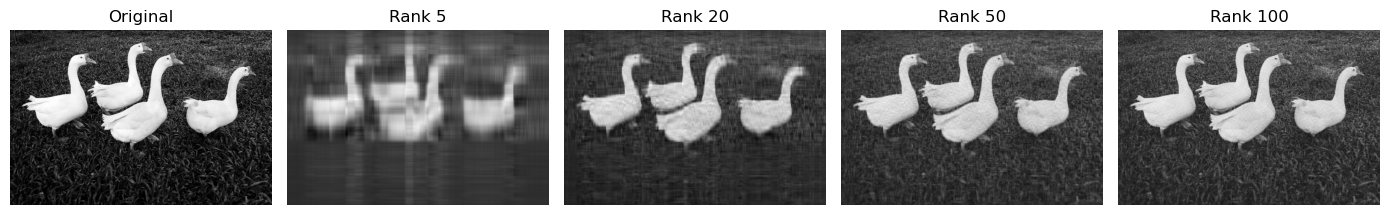

In [7]:
# Ranks to visualize
ranks = [5, 20, 50, 100]

# Plot original and approximations
plt.figure(figsize=(14, 6))
plt.subplot(1, len(ranks) + 1, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, k in enumerate(ranks):
    approx_img = svd_approx(U, S, VT, k)
    plt.subplot(1, len(ranks) + 1, i + 2)
    plt.imshow(approx_img, cmap='gray')
    plt.title(f"Rank {k}")
    plt.axis("off")

plt.tight_layout()
plt.savefig("imgcompression.png")
plt.show()

We end this notebook with the following memory comparison between the original image and the data requried for the compressed images.

In [8]:
m, n = image_gray.shape
itemsize = U.dtype.itemsize  # typically 8 bytes for float64

print("\nMemory comparison:")
print(f"{'k':>6}  {'params(k)':>12}  {'factors bytes':>14}  {'orig bytes':>11}  {'ratio vs orig':>13}")
orig_bytes = image_gray.nbytes

for k in ranks:
    # bytes if you store the compressed representation (the factors)
    factors_bytes = U[:, :k].nbytes + S[:k].nbytes + VT[:k, :].nbytes

    ratio = factors_bytes / orig_bytes if orig_bytes else float('nan')
    params = k * (m + n + 1)

    print(f"{k:6d}  {params:12d}  {factors_bytes:14d}  {orig_bytes:11d}  {ratio:13.3f}")


Memory comparison:
     k     params(k)   factors bytes   orig bytes  ratio vs orig
     5         11075           88600      9412864          0.009
    20         44300          354400      9412864          0.038
    50        110750          886000      9412864          0.094
   100        221500         1772000      9412864          0.188


-----